In [2]:
from itertools import starmap

species_values = {'A':6, 'B': 2, 'C': 6}
eqs = {'D': lambda x,y: x ** y, 'E': lambda x: x ** 8}
to_solve = {'D': ['A', 'B'], 'E': ['C']}

values_list = [[[species_values[value] for value in list]] for list in list(to_solve.values())]
eqs_list = list(eqs.values())

ultramap = [list(starmap(eqs_list[i], values_list[i])) for i in range(len(list(eqs.keys())))]

In [3]:
from itertools import starmap

species_values = {'A':6, 'B': 2, 'C': 6}
eqs = {'D': lambda x,y: x ** y, 'E': lambda x: x ** 8}
to_solve = {'D': ['A', 'B'], 'E': ['C']}

values_list = [[[species_values[value] for value in list]] for list in list(to_solve.values())]
eqs_list = list(eqs.values())

ultramap = [list(starmap(eqs_list[i], values_list[i])) for i in range(len(list(eqs.keys())))]
print(ultramap)

[[36], [1679616]]


In [4]:
a = [[1, 2],[2, 3]]

[print(i,v) for i,v in a]

1 2
2 3


[None, None]

Text(0.5, 1.0, 'E.coli Size Model')

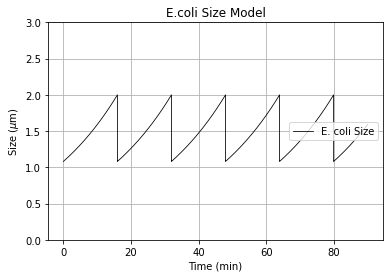

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def bacteria_size(birth_size=1, division_time=18, tmax=10, dt=0.01, division_size=2.0): # sb: micrometros | dt: min
    size_storage = []
    time_storage = []
    time = 0
    counter = 0

    while counter < tmax:

        mu = np.log(2)/division_time
        size = birth_size * np.exp(mu*time)
        reference_tau = 1/mu * np.log(division_size/birth_size)

        size_storage.append(size)
        time_storage.append(counter)

        if size >= division_size:
            time = 0

        elif size < division_size:
            time += dt

        counter += dt
    return time_storage, size_storage

div_s = 2
sb = np.random.normal(loc=div_s/2, scale=0.1*(div_s/2))


time, size = bacteria_size(birth_size=sb,tmax=90) 
plt.plot(time, size, lw=0.8, color='k', label='E. coli Size') 
plt.grid(True)

plt.legend(loc=5)

plt.xlabel('Time (min)')
plt.ylabel(r'Size (${\mu}$m)')
plt.ylim(0, 3)

plt.title('E.coli Size Model')

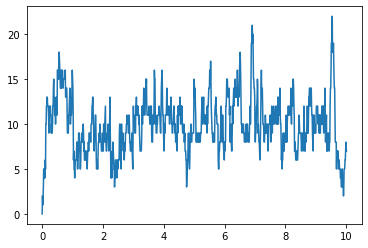

In [16]:
kr=100
gammar=10
t=0#tiempo
r=0#condicion inicial
tarray=[]
rarray=[]
samp_time=0.01
tref=0
tmax = 10

while t<tmax:

    if r>0:
        tcrea=-(1/kr)*np.log(np.random.rand())
        tdeg=-(1/(gammar*r))*np.log(np.random.rand())

        tau = np.min([tcrea,tdeg])
        reac = np.argmin([tcrea,tdeg])
    else:
        tau=-(1/kr)*np.log(np.random.rand())
        reac=0
        
    if t + tau < tref:
        if reac == 0:
            r+=1
        else:
            r+=-1
        t+=tau
    else:
        t=tref       
        tarray.append(t)
        rarray.append(r)
        tref+=samp_time    
plt.plot(tarray,rarray)

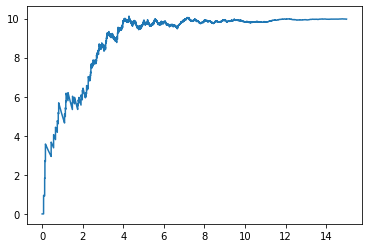

In [2]:
s0=1
mu=np.log(2)
k=10*np.log(2)
tmax = 15

t=0#tiempo
y=0#condicion inicial


tarray=[]
yarray=[]
samp_time=0.001
tref=0

while t<tmax: 
    R=np.random.rand()
    tocc=(1/mu)*np.log(1-(mu*np.log(R)/(k*s0*np.exp(mu*t))))
    if t+tocc<tref:
        y+=1
        t+=tocc
    else:
        t=tref       
        tarray.append(t)
        yarray.append(y/(s0*np.exp(mu*t)))
        tref+=samp_time    
plt.plot(tarray,yarray)